<a href="https://colab.research.google.com/github/Amankr351/Netflix-Movies-and-TV-Shows-Clustering-Project./blob/main/Netflix_Movies_And_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Netflix Movies and TV Shows Clustering.

##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Team Member 1**-  $\color{green}{\text{Aman kumar.}}$

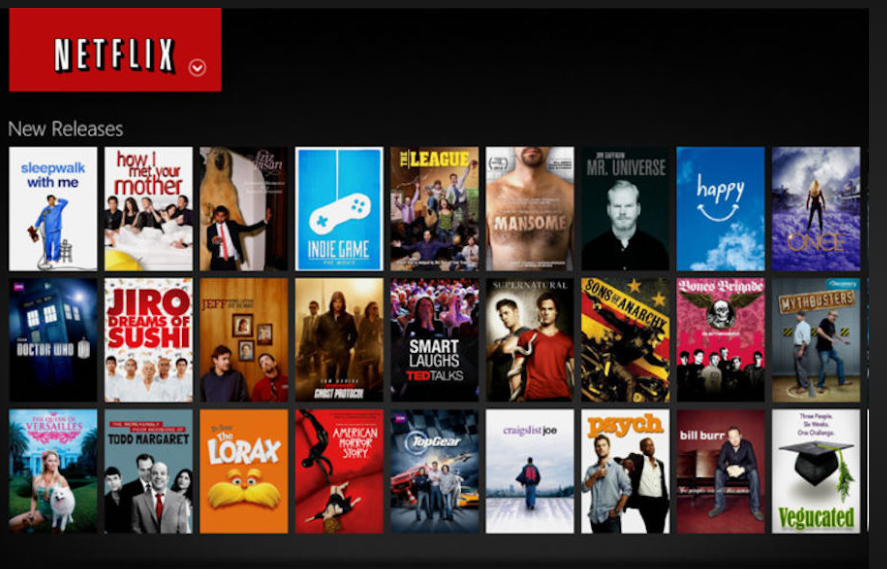

##Project Summary

Netflix, the world’s largest on-demand internet streaming media and online DVD movie rental service provider.it Founded August 29, 1997, in Los Gatos, California by Marc and Reed. It has 69 million members in over 60 countries enjoying more than 100 million hours of TV shows and movies per day Netflix is the world’s leading internet entertainment service with enjoying TV series, documentaries, and feature films across a wide variety of genres and languages. I was curious to analyze the content released in Netflix platform which led me to create these simple, interactive, and exciting visualizations and find similar groups of people.

Starting with loading the data so far we have done EDA, There are two types of content TV shows and Movies(30.9% contains TV shows and 69.1% contains Movies). The highest number of movies / TV shows were based out of the US, followed by India and UK. US and India produse more than 70% of the content. Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG. The majority of the shows/movies on Netflix were created for adults and Teens age group. The most content is added to Netflix from october to january. The TV series in the dataset have up to 16 seasons, however the bulk of them only have one and The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed. The dramas is the most popular genre followed by comedies and documentaries for movies and International TV Shows is the most popular genre followed by Crime and Kid's TV for shows.

Results from Unsupervised ML models:

In k-means clustering algorithm the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis. Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained after visualizing the dendrogram. K-means clustering is best for identification then Agglomerative (hierarchical) clustering as the evaluation metrics also indicates the same.

That's it!


##GitHub Link

https://github.com/Amankr351/Netflix-Movies-and-TV-Shows-Clustering-Project..git

##Problem Statement

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, you are required to do

1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features.

##Attribute Information

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description.

##Know Your Data

###Import Libraries

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')


###Dataset Loading

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv', encoding = 'ISO-8859-1')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


##Data preparation and cleaning

In [ ]:
data.shape   #The shape of a DataFrame is a tuple of array dimensions that tells the number of rows and columns of a given DataFrame.

(7787, 12)

In [ ]:
data.info()   #The info() method prints information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
data.isnull().sum()  #To know if there is any missing value or Nan value in the dataset, we can use the isnull() function.

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#total null values
data.isnull().sum().sum()

3631

There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column,10 in date_added and 7 in rating. so we need to handle the null values.

In [ ]:
#Handling Null Values
data['cast'].fillna(value='No cast',inplace=True)
data['country'].fillna(value=data['country'].mode()[0],inplace=True)

In [ ]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
data.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
#Dropping Director Column
data.drop(['director'],axis=1,inplace=True)

In [ ]:
#Checking for duplicate values.
data.duplicated().sum()   

0

As we can see there are no duplicate values, so we can move ahead.

In [ ]:
#again checking is there any null values are not
data.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
#list of columns of the dataframe.
data.columns    

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

##Exploratory Data Analysis

In [ ]:
#darkgrid style
sns.set_style('darkgrid')  

###percentage of Movies and TV Shows in the dataset.

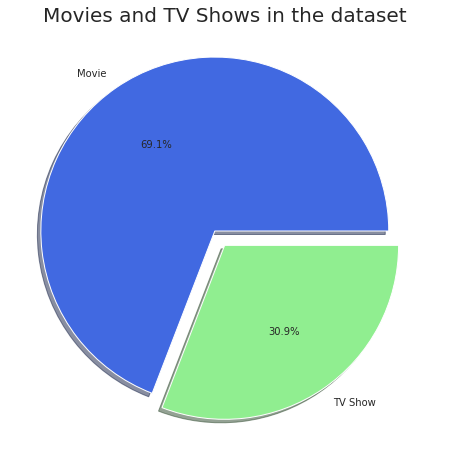

In [ ]:
#creating a visualisation for the type dataframe
plt.figure(figsize=(10,8))
labels = data['type'].value_counts(sort = True).index                 
sizes = data['type'].value_counts(sort = True)
colors = ["royalblue","lightgreen"]
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Movies and TV Shows in the dataset',size = 20)
plt.show()

There are more movies (69.14%) than TV shows (30.86%) in the dataset.

###Distribution by released year

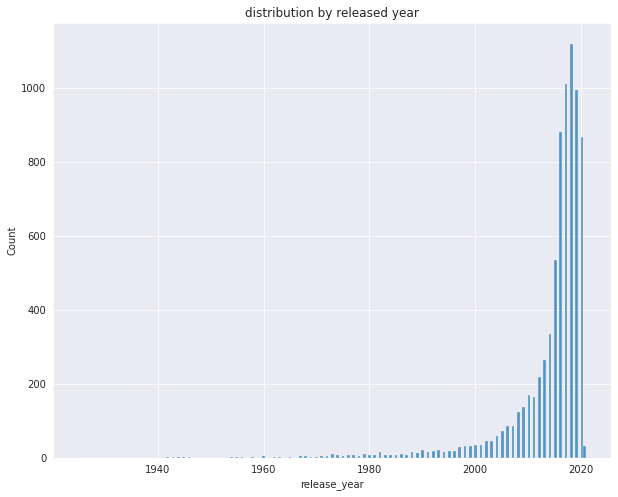

In [ ]:
#visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,8))
sns.histplot(data['release_year'])
plt.title('distribution by released year');

Netflix has greater number of new movies / TV shows than the old ones.

###Distribution of rating for movies/TV shows in the dataset

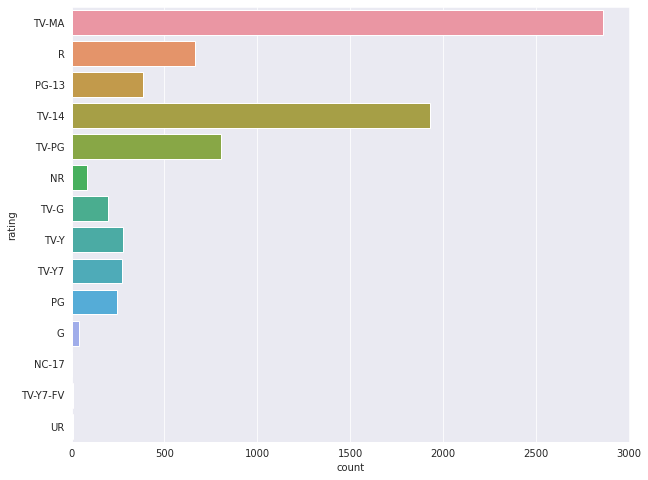

In [ ]:
#age ratings for movies/TV shows in the dataset
plt.figure(figsize=(10,8))
sns.countplot(y='rating',data=data);

Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG.

In [ ]:
#assigning the Ratings into grouped categories 
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
data['target_ages'] = data['rating'].replace(ratings)


In [ ]:
#target_ages is another category (4 classes)
data['target_ages'] = pd.Categorical(data['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
data.head(5)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens


###Analysing for different age groups

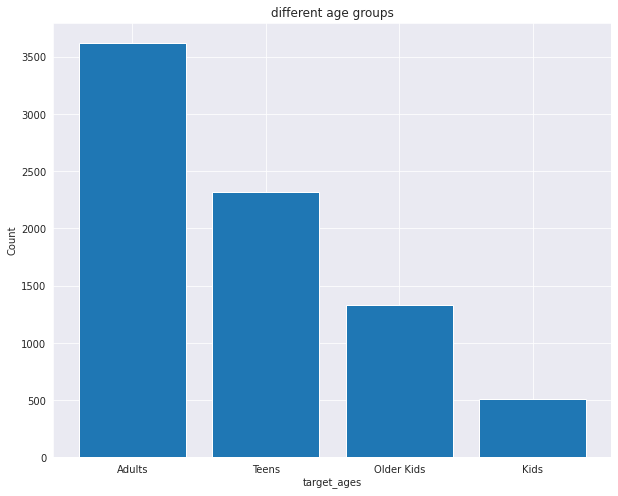

In [ ]:
#creating a visualisation for the different age groups.
x = data['target_ages'].value_counts().index
y =  data['target_ages'].value_counts()

plt.figure(figsize=(10,8))
plt.title('different age groups')
plt.bar(x, y, width =0.8)         
plt.ylabel('Count')
plt.xlabel('target_ages')                 
plt.title('different age groups');

Around 50% of shows on Netflix are produced for adult audience. Followed by teens, older kids and kids. Netflix has the least number of shows that are specifically produced for kids..

###Analysing for different country

In [ ]:
#choosing the primary country and primary genre to simplify the analysis
data['country'] = data['country'].apply(lambda x: x.split(',')[0])
data['listed_in'] = data['listed_in'].apply(lambda x: x.split(',')[0])

In [ ]:
#country DataFrame
data.country.value_counts()

United States     3379
India              956
United Kingdom     576
Canada             259
Japan              235
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 81, dtype: int64

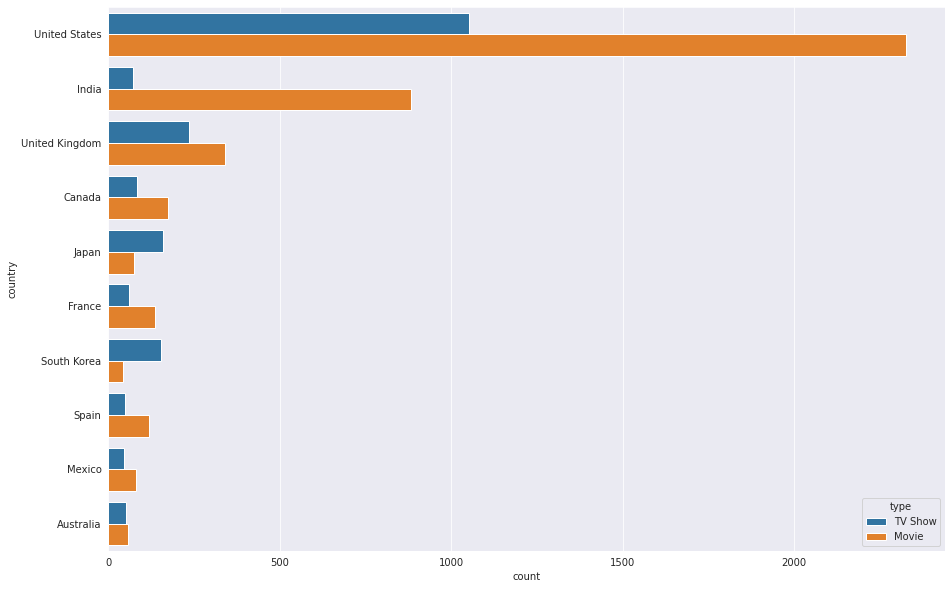

In [ ]:
#creating a visualisation for the different country.
plt.figure(figsize=(15,10))
sns.countplot(y=data['country'],data=data,order=data['country'].value_counts().index[0:10], hue = data['type']);

The highest number of movies / TV shows were based out of the US, followed by India and UK.

###Analysing for different genre of shows and movies

In [ ]:
#genre of shows and movies
data.listed_in.value_counts()

Dramas                          1383
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         356
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     146
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            52
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

In [ ]:
#creating two extra columns
movies = data[data['type'] == 'Movie']
shows = data[data['type'] == 'TV Show']



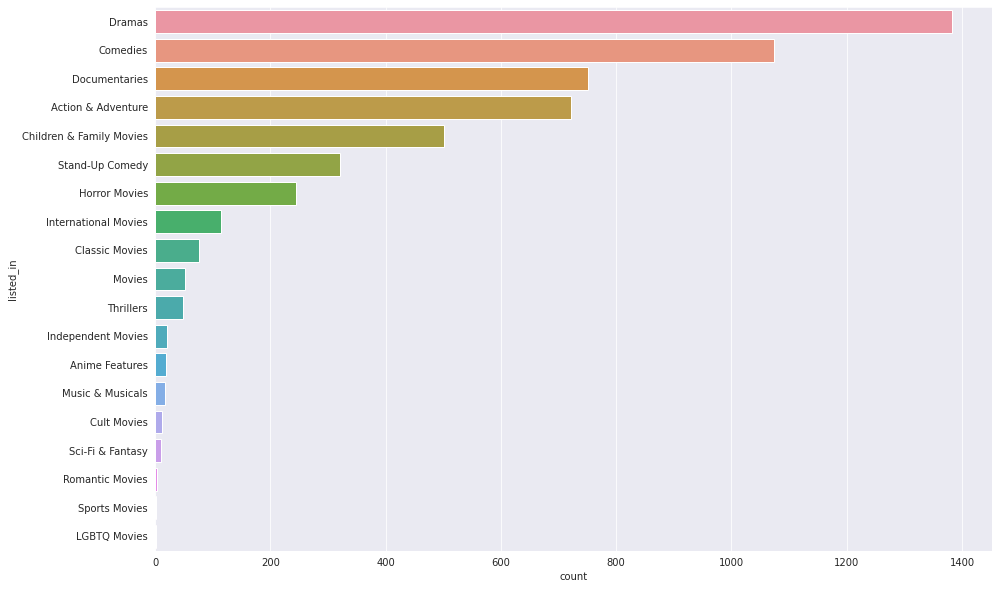

In [ ]:
#visualisation of top 20 genres for movies.
plt.figure(figsize=(15,10))
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:20]);

The dramas is the most popular genre followed by comedies and documentaries for movies.

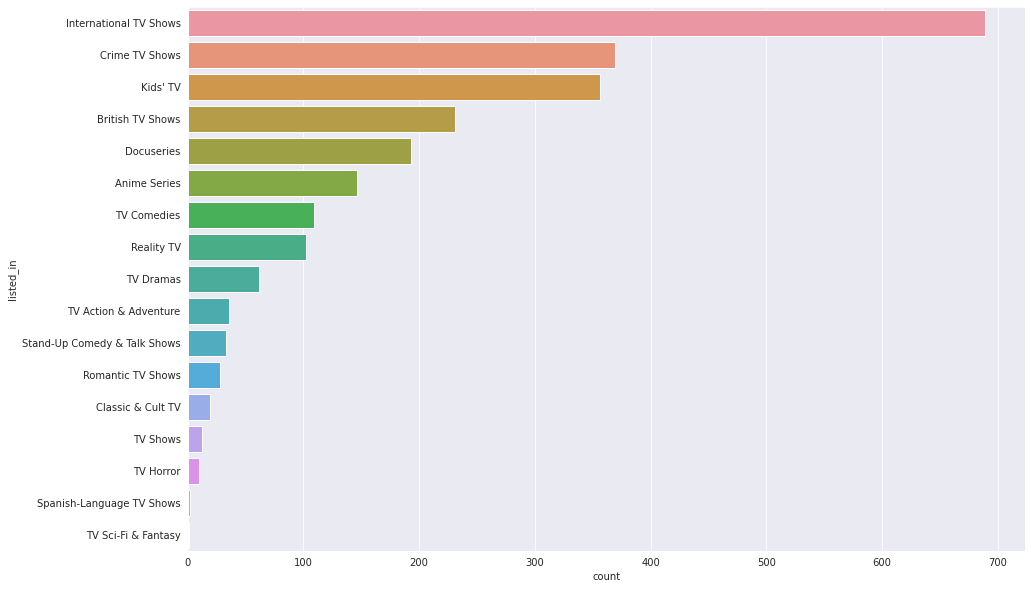

In [ ]:
#visualisation of top 20 genres for shows.
plt.figure(figsize=(15,10))
sns.countplot(y=shows['listed_in'],data=shows,order=shows['listed_in'].value_counts().index[0:20]);

International TV Shows is the most popular genre followed by Crime and Kid's TV for shows.

###Analysing for duration of shows and movies

In [ ]:
#duration of shows and movies
data.duration.value_counts()

1 Season     1606
2 Seasons     378
3 Seasons     183
90 min        136
93 min        131
             ... 
182 min         1
224 min         1
37 min          1
233 min         1
191 min         1
Name: duration, Length: 216, dtype: int64

In [ ]:
#splitting the duration column, and changing the datatype to integer
movies['duration'] = movies['duration'].apply(lambda x: int(x.split()[0]))
shows['duration'] = shows['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
#duration of movies
movies.duration.value_counts()

90     136
93     131
94     125
91     125
95     119
      ... 
182      1
224      1
37       1
233      1
191      1
Name: duration, Length: 201, dtype: int64

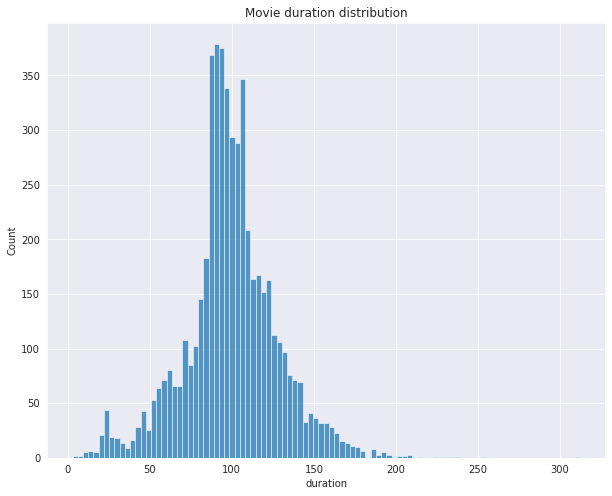

In [ ]:
#length of movie analysis
plt.figure(figsize=(10,8))
sns.histplot(x='duration',data=movies)
plt.title('Movie duration distribution');

The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.

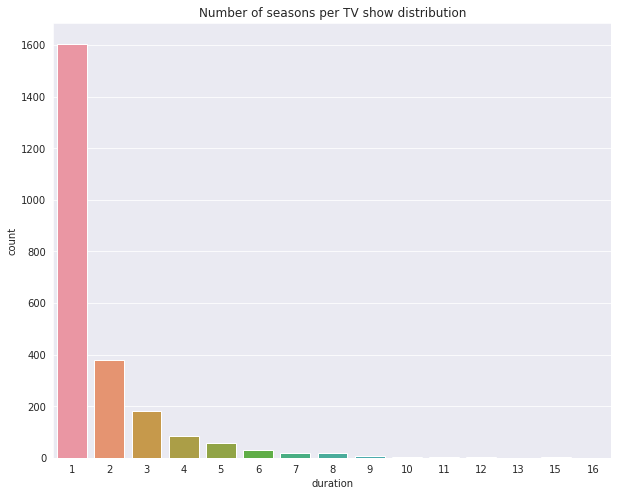

In [ ]:
#seasons in each TV show
plt.figure(figsize=(10,8))
sns.countplot(x='duration',data=shows)
plt.title('Number of seasons per TV show distribution');

The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way and There are very few TV shows that have more than 8 seasons.

###Analysing for Number of movies and TV shows added over the years

In [ ]:
#typecasting 'date_added' from string to datetime
data["date_added"] = pd.to_datetime(data['date_added'])

In [ ]:
#adding new attributes month and year of date added

data['month_added'] = data['date_added'].dt.month
data['year_added'] = data['date_added'].dt.year
data.drop('date_added', axis=1, inplace=True)

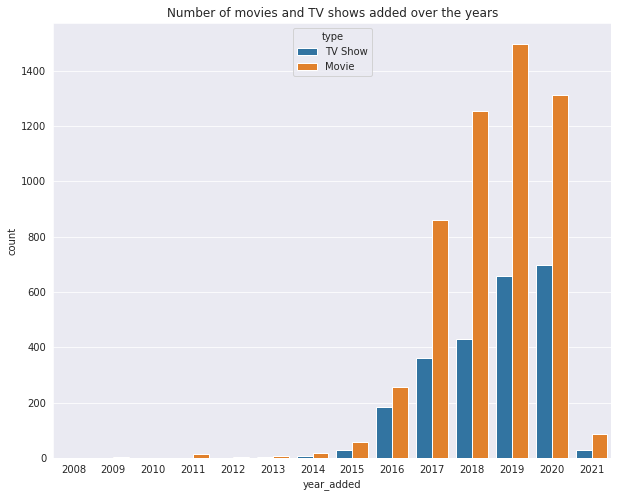

In [ ]:
#number of movies and TV shows added over the years
plt.figure(figsize=(10,8))
sns.countplot(x='year_added',data=data, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('year_added');

The above graph shows that the most content is added to Netflix after 2014.

###Analysing for Number of movies and TV shows added over the months

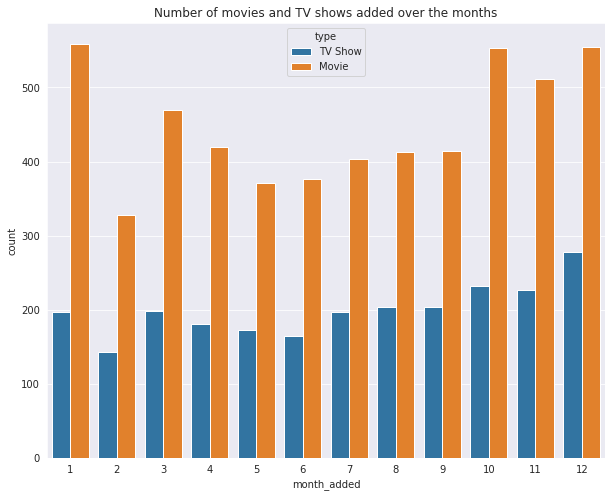

In [ ]:
#number of movies and TV shows added over the months
plt.figure(figsize=(10,8))
sns.countplot(x='month_added',data=data, hue='type')
plt.title('Number of movies and TV shows added over the months')
plt.xlabel('month_added');

The above graph shows that the most content is added to Netflix in December and January.

###Numbers of movies and TV shows whose release_year and added_year same

In [ ]:
#numbers of movies and TV shows whose release_year and added_year same
data[data.year_added == data.release_year]['type'].value_counts()

Movie      1612
TV Show    1211
Name: type, dtype: int64

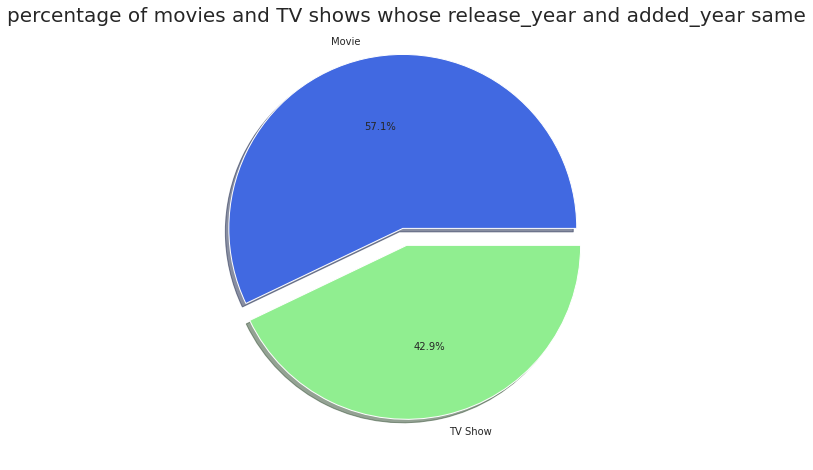

In [ ]:
#percentage of movies and TV shows whose release_year and added_year same
content = data[data['year_added'] == data['release_year']]
plt.figure(figsize=(10,8))
labels = content['type'].value_counts(sort = True).index                 
sizes = content['type'].value_counts(sort = True)
colors = ["royalblue","lightgreen"]
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('percentage of movies and TV shows whose release_year and added_year same',size = 20)
plt.show()

From the above graph, we can see that 57.1% Movies and 42.9% TV Shows have same release_year and added_year.

##Data preprocessing

In [ ]:
#description of shows and movies
data['description'].astype(str)

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7770, dtype: object

In [ ]:
#after above all the changes, those features are in list format, so making list of description feature
data['description'] = data['description'].apply(lambda x: x.split(' '))

In [ ]:
#converting text feature to string from list
data['description']= data['description'].apply(lambda x: " ".join(x))
# making all the words in text feature to lowercase
data['description']= data['description'].apply(lambda x: x.lower())

###Removing Stopwords

In [ ]:
#extracting the stopwords from nltk library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
#displaying the stopwords
np.array(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    #joining the list of words with space separator
    return " ".join(text)
#applying above function on text feature
data['description']=data['description'].apply(stopwords)
#this is how value in text looks like after removing stopwords
data['description'][0]

'future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.'

###Removing punctuation

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    #replacing the punctuations with no space, 
    #which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    #return the text stripped of punctuation marks
    return text.translate(translator)
#applying above function on text feature
data['description']= data['description'].apply(remove_punctuation)

In [ ]:
#confirmation
data['description'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

###Stemming Description

In [ ]:
#creating a function of stemming function using SnowballStemmer module

from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 
     

In [ ]:
#applying above created STEMMING function to the DESCRIPTION attribute.

data['description'] = data['description'].apply(stemming)

In [ ]:
#confirmation

data['description'][0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

After Data preprocessing we see the unwanted words are removed.

###lets add some column for lenght of our processed data

In [ ]:
#add description length column 

data['description_length']=data['description'].apply(lambda x : len(x))


In [ ]:
#create function to convert list into string

def listToString(s):
    str1 = ""
    for ele in s:
        str1 += ele
    return str1

In [ ]:
#convert list to string

data['listed_in']=data['listed_in'].apply(listToString)

In [ ]:
#create a column for length of genre

data['genre_length']=data['listed_in'].apply(lambda x : len(x))

In [ ]:
#confermation

data.head()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,target_ages,month_added,year_added,description_length,genre_length
0,s1,TV Show,3%,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020,TV-MA,4 Seasons,International TV Shows,futur elit inhabit island paradis far crowd sl...,Adults,8,2020,82,22
1,s2,Movie,7:19,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,2016,TV-MA,93 min,Dramas,devast earthquak hit mexico citi trap survivor...,Adults,12,2016,88,6
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,Horror Movies,armi recruit found dead fellow soldier forc co...,Adults,12,2018,102,13
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,Action & Adventure,postapocalypt world ragdol robot hide fear dan...,Teens,11,2017,94,18
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,brilliant group student becom cardcount expert...,Teens,1,2020,99,6


##Unsupervised Machine Learning Clustring Models

Unsupervised learning is a type of machine learning in which models are trained using unlabeled dataset and are allowed to act on that data without any supervision.

In this project we will be include the following models:

1) K-Means Clustering.

2) Heirarchical Clustering.

###K-Means Clustering

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters.

In [ ]:
#importing the required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:

#standerd scale our data set train the dataset
X_features_rec_mon=data[['description_length','genre_length']]
scaler_rec_mon=StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

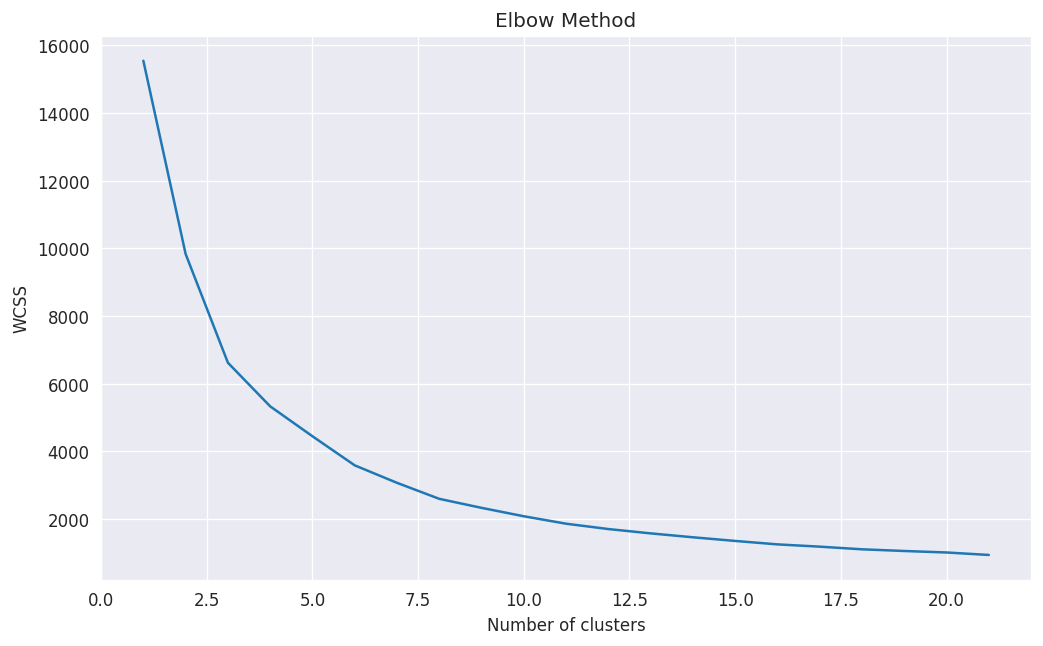

In [ ]:

#Interpretation of a line plot with an elbow shape

plt.figure(figsize=(10,6), dpi=120)

#within clusters sum of squares
wcss=[]
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#predict and check the silhouette score

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3681023252096988
For n_clusters = 3, silhouette score is 0.37015298033368577
For n_clusters = 4, silhouette score is 0.35573001652104397
For n_clusters = 5, silhouette score is 0.33519353722570533
For n_clusters = 6, silhouette score is 0.38080250941678634
For n_clusters = 7, silhouette score is 0.3808849369297683
For n_clusters = 8, silhouette score is 0.3823687364832213
For n_clusters = 9, silhouette score is 0.381224893671821
For n_clusters = 10, silhouette score is 0.37738796215427817
For n_clusters = 11, silhouette score is 0.3658062076412813
For n_clusters = 12, silhouette score is 0.3773844518840132
For n_clusters = 13, silhouette score is 0.38213096030603977
For n_clusters = 14, silhouette score is 0.37706055200801275
For n_clusters = 15, silhouette score is 0.3866113608183172
For n_clusters = 16, silhouette score is 0.3804170598097521
For n_clusters = 17, silhouette score is 0.3849582667699463
For n_clusters = 18, silhouette score is 0

In [ ]:
#K-Means Clustering
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)
y_kmeans

array([2, 3, 4, ..., 4, 1, 4], dtype=int32)

In [ ]:
#create a 'clusters' column 
data['clusters'] = y_kmeans
data['clusters'].value_counts()

3    1942
4    1654
0    1288
1    1055
5     924
2     907
Name: clusters, dtype: int64

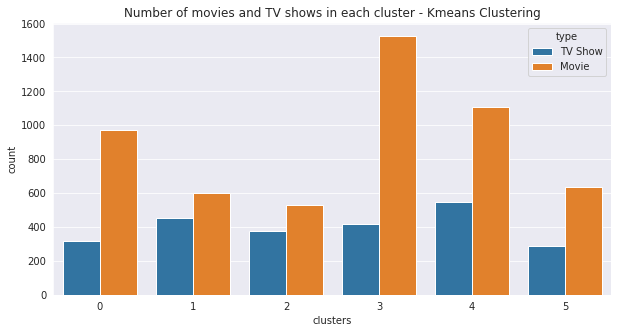

In [ ]:
#graphical representaion of K-Means Clustering

plt.figure(figsize=(10,5))
sns.countplot(x='clusters',data=data, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering');

Successfully built 6 clusters using the k-means clustering algorithm.

####Evaluation

In [ ]:
#Silhouette score
score1 = silhouette_score(X, y_kmeans)
print("Silhouette score is {}".format(score1))

Silhouette score is 0.3811411056372871


###Heirarchical Clustering

Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm.

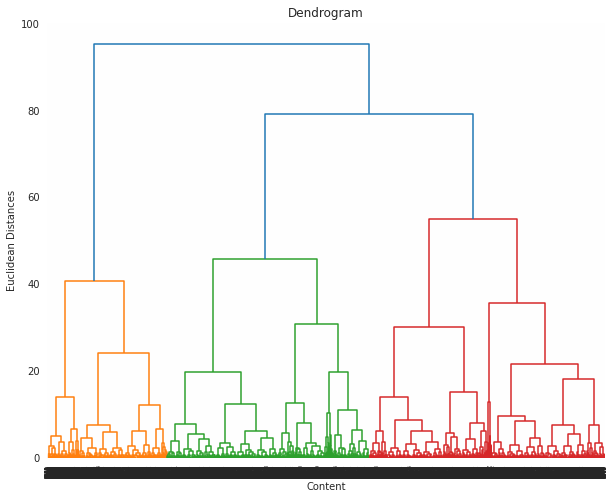

In [ ]:
#creating dendogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()

Finding largest vertical distance we can make without crossing any other horizontal line.

In [ ]:
#applying agglomerative clustring

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

array([0, 3, 4, ..., 4, 5, 4])

In [ ]:
#create a 'clusters_hc' column 
data['clusters_hc'] = y_hc
data['clusters_hc'].value_counts()

1    2056
4    1570
3    1267
0    1214
5     992
2     671
Name: clusters_hc, dtype: int64

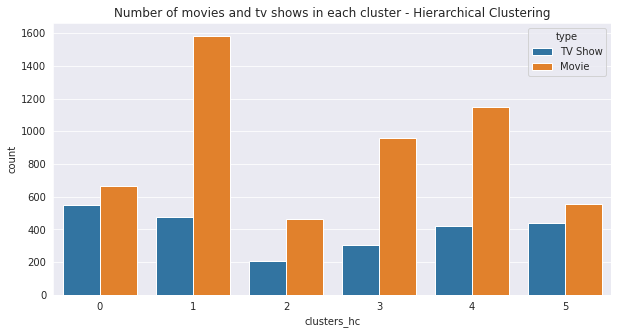

In [ ]:
#graphical representaion of Heirarchical Clustering

plt.figure(figsize=(10,5))
sns.countplot(x='clusters_hc',data=data, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering');

Successfully built 6 clusters using the Agglomerative (hierarchical) clustering algorithm.

####Evaluation

In [ ]:
#Silhouette score
score2 = silhouette_score(X, y_hc)
print("Silhouette score is {}".format(score2))

Silhouette score is 0.3489187030832517


##Conclusion

That's it! We reached the end of our exercise.

Starting with loading the data so far we have done EDA, There are two types of content TV shows and Movies(30.9% contains TV shows and 69.1% contains Movies). The highest number of movies / TV shows were based out of the US, followed by India and UK. US and India produse more than 70% of the content. Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG. The majority of the shows/movies on Netflix were created for adults and Teens age group. The most content is added to Netflix from october to january. The TV series in the dataset have up to 16 seasons, however the bulk of them only have one and The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed. The dramas is the most popular genre followed by comedies and documentaries for movies and International TV Shows is the most popular genre followed by Crime and Kid's TV for shows.

Results from Unsupervised ML models:

In k-means clustering algorithm the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis. Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained after visualizing the dendrogram. K-means clustering is best for identification then  Agglomerative (hierarchical) clustering as the evaluation metrics also indicates the same...